**Predicting if a person would buy life insurnace based on his age using logistic regression**

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib

In [3]:
df = pd.read_csv("insurance_data.csv")
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


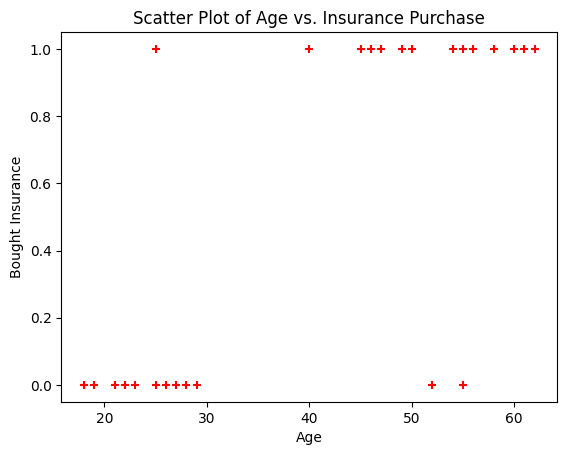

In [4]:
# Creating a scatter plot using Matplotlib
plt.scatter(df.age, df.bought_insurance, marker='+', color='red')

# Adding labels to the axes for better interpretation
plt.xlabel('Age')  # X-axis label
plt.ylabel('Bought Insurance')  # Y-axis label

# Adding a title to the plot
plt.title('Scatter Plot of Age vs. Insurance Purchase')

# Displaying the plot
plt.show()


In [5]:
from sklearn.model_selection import train_test_split

In [25]:
# Splitting the data into training and testing sets using train_test_split
# df[['age']] selects the 'age' column as the feature (X)
# df.bought_insurance is the target variable (y)
# test_size=0.1 specifies that 10% of the data will be used for testing
X_train, X_test, y_train, y_test = train_test_split(df[['age']], df.bought_insurance, test_size=0.1)


In [33]:
X_test

,age
6,55
15,55
25,54


In [27]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [28]:
model.fit(X_train, y_train)

LogisticRegression()

In [31]:
# Using the trained model to make predictions on the test set
# model.predict generates predicted labels for the input data X_test
predicted_labels = model.predict(X_test)
predicted_labels

array([1, 1, 1])

label 1 indicates that customer is going to buy insurance and if we see above for X_test their ages are 55,55,54 so they will buy insurances

In [34]:
# Using the trained model to evaluate its accuracy on the test set
# model.score calculates the mean accuracy of the model on the given test data and labels
accuracy = model.score(X_test, y_test)
accuracy

0.6666666666666666

In [35]:
model.predict_proba(X_test)

array([[0.04439318, 0.95560682],
       [0.04439318, 0.95560682],
       [0.05212519, 0.94787481]])

here the probability shown if the person will or will not buy insurance and for all there cases the persons are buying

In [45]:
# Assuming '30' is the age for which you want to make a prediction
new_age = [[30]]  # Note: It's important to provide the feature in the same format as your training data

# Using the trained model to predict whether insurance is bought for the given age
predicted_class = model.predict(new_age)

# Displaying the predicted class
print(f"For age 30, the predicted class is: {predicted_class[0]}")

For age 30, the predicted class is: 0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(



**model.coef_ indicates value of m in y=m*x + b equation**

In [50]:
model.coef_

array([[0.16868653]])


**model.intercept_ indicates value of b in y=m*x + b equation**

In [52]:
model.intercept_

array([-6.20849868])

**Lets defined sigmoid function now and do the math with hand**

In [46]:
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

In [53]:
def prediction_function(age):
    # Calculate the linear combination of the input feature 'age' with model coefficients
    z = 0.168 * age - 6.208  # Using model coefficients obtained from training

    # Apply the sigmoid function to get the predicted probability
    y = sigmoid(z)

    # Return the predicted probability
    return y


In [54]:
age = 35
prediction_function(age)

0.41872733339077467

**0.418 is less than 0.5 which means person with 35 age will not buy insurance**

In [55]:
age = 43
prediction_function(age)

0.7341927159913736

**0.734 is more than 0.5 which means person with 43 will buy the insurance**